# # Data Preview / Visualization

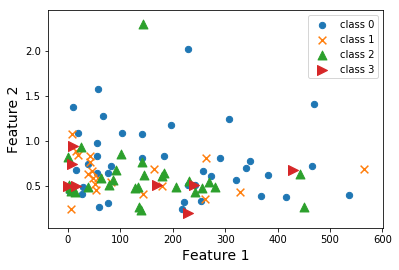

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

y0 = data[data.Class == 0] 
y1 = data[data.Class == 1] 
y2 = data[data.Class == 2] 
y3 = data[data.Class == 3]

markers = ['o','x','^','>']
sizes = [40,60,80,100]

for dot, n in zip([y0, y1, y2, y3], range(4)):
    x = dot['Feature 1']
    y = dot['Feature 2']
    plt.scatter(x, y, marker = markers[n], s= sizes[n])
    
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.legend(['class 0', 'class 1', 'class 2', 'class 3'], loc='upper right')
plt.show()


# # Decision Tree ( check )

C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : Decision Tree
alpha : 2
Score : 0.44898


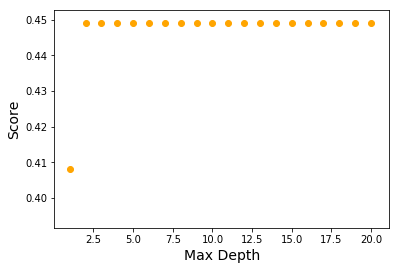

In [21]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()

y = data.Class 

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)


# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

score_sum = 0

for alpha in range(1,21):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        clf = tree.DecisionTreeClassifier(max_depth = alpha)
        clf = clf.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += clf.score(X_test, y_test)
    #======[ Score Check ]===========================#
    mean = score_sum / len(data)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    plt.scatter(alpha, highest_score, c = 'orange')
    
#__Print__Score__#
print("Model : Decision Tree")
print("alpha : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('Max Depth', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()


# # KNN Algorithm ( Check )

C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : KNN Algorithm
alpha : 11
Score : 0.510204


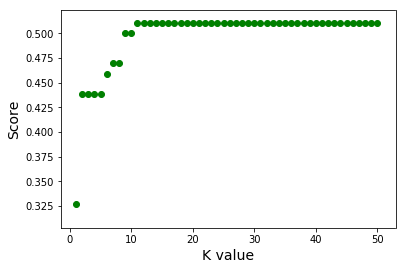

In [29]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()

y = data.Class 

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

score_sum = 0

# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

for alpha in range(1,51):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        knn = KNeighborsClassifier(n_neighbors = alpha) 
        knn.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += knn.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(data)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    plt.scatter(alpha, highest_score, c = 'green')
    
#__Print__Score__#
print("Model : KNN Algorithm")
print("alpha : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('K value', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()

# # SVM(RBF Kernel)

In [ ]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()

y = data.Class 

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

score_sum = 0

# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

for alpha in range(100, 100000, 1000):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        svm = SVC(kernel='rbf', C=alpha, gamma = 0.01)
        svm.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += svm.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(data)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    
    
#__Print__Score__#
print("Model : Decision Tree")
print("alpha : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))

# # Logistic Regression

In [4]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()

y = data.Class 

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

score_sum = 0

# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

for alpha in range(1, 1000, 100):
    parameter = alpha / 100
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        lr = LogisticRegression(C = parameter, random_state=0, solver='lbfgs', multi_class='multinomial', max_iter = 10000) 
        lr.fit(features, labels) 
        #=======[ Score Aggregation ]=================#
        score_sum += lr.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(data)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = parameter
    score_sum = 0
    
#__Print__Score__#
print("Model : Decision Tree")
print("alpha : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))

C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Logistic Regression 스코어는 0.418367이고 최적의 alpha값은 1.01입니다


# # Random Forest

In [ ]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()

y = data.Class 

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

score_sum = 0

# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

for alpha in range(1,50):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        clf = tree.DecisionTreeClassifier(max_depth = alpha)
        clf = clf.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += clf.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(data)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    
#__Print__Score__#
print("Model : Decision Tree")
print("alpha : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))

# # Ada Boost

In [ ]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()

y = data.Class 

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

score_sum = 0

# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

for alpha in range(1,50):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        clf = tree.DecisionTreeClassifier(max_depth = alpha)
        clf = clf.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += clf.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(data)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    
#__Print__Score__#
print("Model : Decision Tree")
print("alpha : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))

# # Total

### - Desicison Tree -
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = alpha)

### - KNN -
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = alpha) 

### - SVM ( RBF kernel ) -
from sklearn import svm
svm = SVC(kernel='rbf', C=alpha, gamma = 0.01)

### - LR -
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = parameter, random_state=0, solver='lbfgs', multi_class='multinomial') 

### - Random Forest -

### - Ada Boost -        

### - Niave Baise -

In [ ]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np

# Models #
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


import matplotlib.pyplot as plt

alpha = 1
dt = tree.DecisionTreeClassifier(max_depth = alpha)
knn = KNeighborsClassifier(n_neighbors = alpha)
svm = SVC(kernel='rbf', C=alpha, gamma = 0.01)
lr = LogisticRegression(C = alpha, random_state=0, solver='lbfgs', multi_class='multinomial')
nb = MultinomialNB()


sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
mn = MultinomialNB()


#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()

y = data.Class 

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

score_sum = 0
score_array = [0.1]
# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

for model in [dt, knn, svm, lr, nb]:
    while(alpha < 10):
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            #========[ Learning ]=========================#
            features = X_train 
            labels = y_train 
            #========[ Model Module ]=====================#
            model.fit(features, labels)
            
            #=======[ Score Aggregation ]=================#
            score_sum += model.score(X_test, y_test)

        #======[ Score Check ]===========================#
        mean = score_sum / len(data)
        if(highest_score < mean):
            highest_score = mean
            highest_alpha = alpha
        score_sum = 0
    print("스코어는 {0:.6}이고 최적의 alpha값은 {1}입니다".format(highest_score, highest_alpha))
    highest_score = 0
    highest_alpha = 0
    alpha += 1
    alpha = 1
        
    

C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
